In [2]:
import glob
import numpy as np
import pandas as pd 
import os

In [3]:
os.listdir('train-set/')

['ba',
 'ca',
 'da',
 'ga',
 'ha',
 'ja',
 'ka',
 'la',
 'ma',
 'na',
 'nga',
 'nya',
 'pa',
 'ra',
 'sa',
 'ta',
 'wa',
 'ya']

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [5]:
import matplotlib.pyplot as plt

def plot_images(imgs, labels=None, rows=1, figsize=(20,8), fontsize=14):
    figure = plt.figure(figsize=figsize)
    cols = max(1,len(imgs) // rows-1)
    labels_present = False
    # checking if labels is a numpy array
    if type(labels).__module__ == np.__name__:
        labels_present=labels.any()
    elif labels:
        labels_present=True
    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols+1, i+1)
        # axis off, but leave a bounding box
        plt.tick_params(
            axis='both',
            which='both',
            bottom='off',
            top='off',
            left='off',
            right='off',
            labelbottom='off',
            labelleft='off')
        # plot labels if present
        if labels_present:
            subplot.set_title(labels[i], fontsize=fontsize)
        plt.imshow(imgs[i][:,:,0])
        
    plt.show()

In [6]:
def prepare_dataset(path):
    x_train=[]
    y_train=[]
    label = 0
    for labels in os.listdir(path):
        if labels == 'ka':
            label = 0
        elif labels == 'ca':
            label = 1
        elif labels == 'ta':
            label = 2
        elif labels == 'pa':
            label = 3
        elif labels == 'ya':
            label = 4
        elif labels == 'wa':
            label = 5
        elif labels == 'ga':
            label = 6
        elif labels == 'ja':
            label = 7
        elif labels == 'da':
            label = 8
        elif labels == 'ba':
            label = 9
        elif labels == 'ra':
            label = 10
        elif labels == 'sa':
            label = 11
        elif labels == 'nga':
            label = 12
        elif labels == 'nya':
            label = 13
        elif labels == 'na':
            label = 14
        elif labels == 'ma':
            label = 15
        elif labels == 'la':
            label = 16
        elif labels== 'ha':
            label = 17
            
        all_images_path=glob.glob(path+labels+'/*.jpg')
        for img_path in all_images_path :
                img=load_img(img_path, target_size=(150,150))
                img=img_to_array(img)
                img=img/255.0
                x_train.append(img)
                y_train.append(label)
    return np.array(x_train),np.array(y_train)

In [7]:
x_train, y_train = prepare_dataset('train-set/')

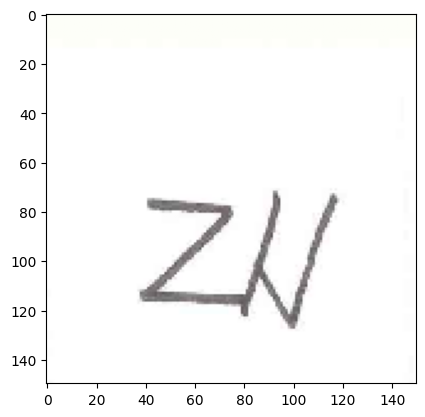

In [8]:
img = x_train[251]
imgplot = plt.imshow(img)
plt.show()

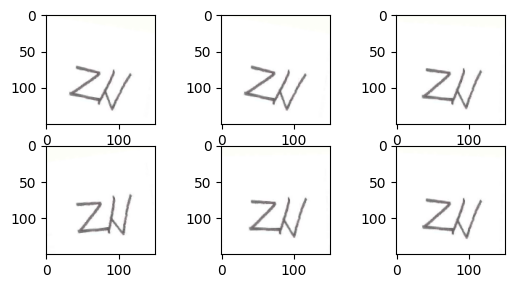

In [9]:
from tensorflow.keras.preprocessing.image import random_shift, random_shear, random_zoom
from numpy import expand_dims

img = x_train[251]
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(rotation_range=10)
it = datagen.flow(samples, batch_size=1)
for i in range(6):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0]
    plt.imshow(image)
plt.show()

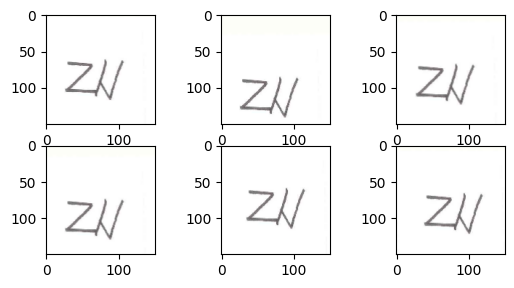

In [10]:
from numpy import expand_dims
img = x_train[251]
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1)
it = datagen.flow(samples, batch_size=1)
for i in range(6):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0]
    plt.imshow(image)
plt.show()

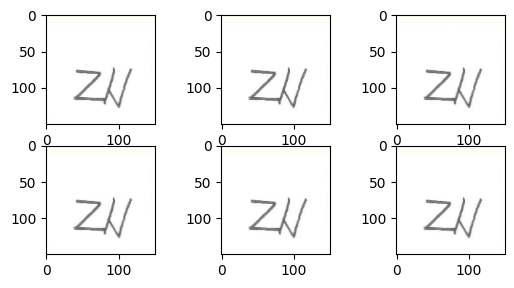

In [11]:
from numpy import expand_dims
img = x_train[251]
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(shear_range=0.9)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(6):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0]
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

In [12]:
x_test, y_test = prepare_dataset('test-set/')

In [13]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers.legacy import Adam

local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
     layer.trainable = False
        
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [14]:
last_layer = pre_trained_model.get_layer('mixed4')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(768, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(18, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])



last layer output shape:  (None, 7, 7, 768)


c:\Users\kiran\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
from keras.preprocessing.image import ImageDataGenerator
import dataaug

datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.3,
        horizontal_flip=False,
        preprocessing_function=lambda x: dataaug.elastic_transform(x, alpha_range=8, sigma=3),
        fill_mode='nearest')

In [16]:
model.fit(datagen.flow(x_train, y_train, batch_size=15),validation_data=(x_test,y_test),
          steps_per_epoch=len(x_train) / 15, epochs=15)

Epoch 1/15
16/16 [==============================] - 19s 959ms/step - loss: 3.6467 - accuracy: 0.0833 - val_loss: 2.6973 - val_accuracy: 0.2336
Epoch 2/15
16/16 [==============================] - 19s 1s/step - loss: 2.9513 - accuracy: 0.1190 - val_loss: 2.2150 - val_accuracy: 0.4112
Epoch 3/15
16/16 [==============================] - 16s 972ms/step - loss: 2.5884 - accuracy: 0.2262 - val_loss: 1.9113 - val_accuracy: 0.4766
Epoch 4/15
16/16 [==============================] - 15s 899ms/step - loss: 2.3787 - accuracy: 0.3135 - val_loss: 1.7177 - val_accuracy: 0.5701
Epoch 5/15
16/16 [==============================] - 15s 904ms/step - loss: 2.0501 - accuracy: 0.3889 - val_loss: 1.4683 - val_accuracy: 0.6636
Epoch 6/15
16/16 [==============================] - 16s 957ms/step - loss: 1.9110 - accuracy: 0.4206 - val_loss: 1.2797 - val_accuracy: 0.6449
Epoch 7/15
16/16 [==============================] - 16s 956ms/step - loss: 1.8312 - accuracy: 0.4643 - val_loss: 1.2083 - val_accuracy: 0.6729
Ep

In [22]:
import matplotlib.pyplot as plt
from random import randint
import matplotlib.pyplot as plt

history_dict = model.history
# plt.plot(model.history['acc'])
# plt.plot(model.history['val_acc'])
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plt.plot(model.history['loss'])
# plt.plot(model.history['val_loss'])
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

TypeError: 'History' object is not subscriptable

In [ ]:
# def pred_dataset(path):
#     x_train=[]
#     all_images_path=glob.glob(path+'/*.jpg')
#     for img_path in all_images_path :
#             img=load_img(img_path, target_size=(150,150))
#             img=img_to_array(img)
#             img=img/255.0
#             x_train.append(img)
#     return np.array(x_train)

# pred_img = pred_dataset('pred/aPredic/')
# pred_img.shape

In [ ]:
# predictions = model.predict(pred_img)

In [ ]:
# def get_classlabel(class_code):
#     labels = {0:'ka', 1:'ca', 2:'ta', 3:'pa', 4:'ya', 5:'wa', 6:'ga', 7:'ja', 8:'da',
#               9:'ba', 10:'ra', 11:'sa', 12:'nga', 13:'nya', 14:'na', 15:'ma', 16:'la', 17:'ha'}
#     classl = labels[class_code]
    
#     return classl

In [ ]:
# import matplotlib.gridspec as gridspec
# import matplotlib.pyplot as plt
# from random import randint
# fig = plt.figure(figsize=(30, 30))
# outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

# for i in range(25):
#     inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
#     rnd_number = randint(0,len(pred_img))
#     pred_image = np.array([pred_img[rnd_number]])
#     x = np.argmax(model.predict(pred_image)[0])
#     for j in range(2):
#         if (j%2) == 0:
#             ax = plt.Subplot(fig, inner[j])
#             ax.imshow((pred_image[0]*255).astype(np.uint8))
#             ax.set_title(get_classlabel(x))
#             ax.set_xticks([])
#             ax.set_yticks([])
#             fig.add_subplot(ax)


# fig.show()